In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier as KNN
import pylab as pl
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

# Task 1. Liniar border. Bias error 0. 

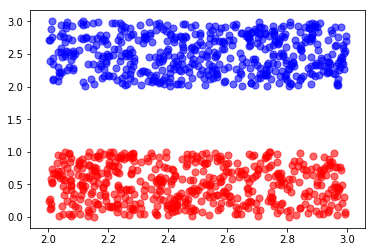

In [2]:
a = np.random.uniform(low=0, high=1, size=(500, 2))
b = np.random.uniform(low=2, high=3, size=(500, 2))

for i in range(0,500):
    a[i, 0] += 2

plt.scatter(a[:, 0], a[:, 1],  c='red',  s=50, alpha=0.6)
plt.scatter(b[:, 0], b[:, 1],  c='blue', s=50, alpha=0.6)

## Task 2. K nearest neighbours.

In [3]:
X = np.vstack((a,b))
y = np.hstack((np.zeros(500),np.ones(500)))
clf = KNN(n_neighbors=5)
clf.fit(X, y)
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


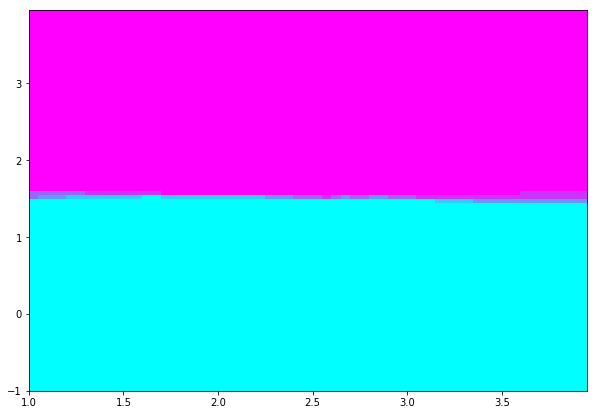

In [4]:
def get_grid(data, border=1., step=.05):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step),
                      np.arange(y_min, y_max, step))
xx, yy = get_grid(X)
X_in=np.hstack((np.reshape(xx,(xx.size,1)), np.reshape(yy,(yy.size,1))))
predicted = clf.predict_proba(X_in)[:, 1].reshape(xx.shape)
pl.figure(figsize=(10, 7))
pl.pcolormesh(xx, yy, predicted, cmap='cool')
pl.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap='cool', alpha=0.7)

## Task 2. SVM with non linear kernel.

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


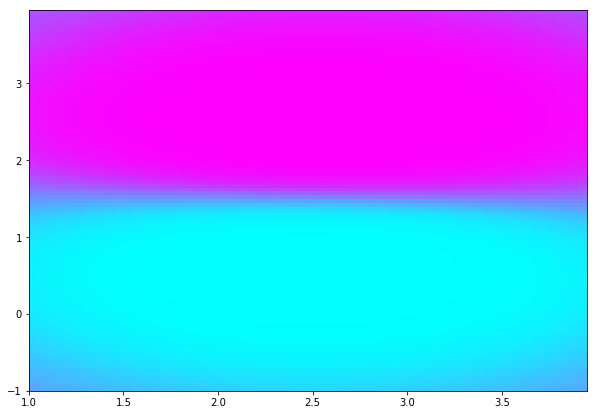

In [5]:
clf = svm.SVC(probability=True)
clf.fit(X,y)
print(clf)
xx, yy = get_grid(X)
X_in=np.hstack((np.reshape(xx,(xx.size,1)), np.reshape(yy,(yy.size,1))))
predicted = clf.predict_proba(X_in)[:, 1].reshape(xx.shape)
pl.figure(figsize=(10, 7))
pl.pcolormesh(xx, yy, predicted, cmap='cool')
pl.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap='cool', alpha=0.7)

## Task 2. Naive bayes.

GaussianNB(priors=None)


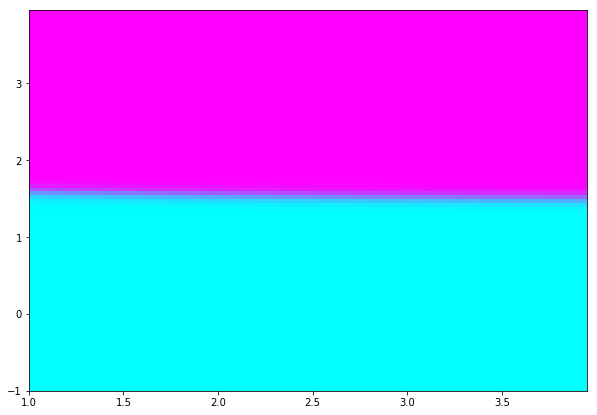

In [6]:
clf = GaussianNB()
clf.fit(X,y)
print(clf)
xx, yy = get_grid(X)
X_in=np.hstack((np.reshape(xx,(xx.size,1)), np.reshape(yy,(yy.size,1))))
predicted = clf.predict_proba(X_in)[:, 1].reshape(xx.shape)
pl.figure(figsize=(10, 7))
pl.pcolormesh(xx, yy, predicted, cmap='cool')
pl.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap='cool', alpha=0.7)

# Task 1. Quadric surface border. Bias error 10%.

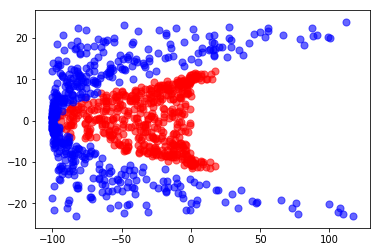

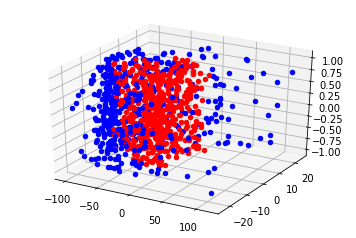

In [12]:
an = 500
cn = 500

a = np.random.uniform(low=-1, high=1, size=(cn,3))
b = np.random.uniform(low=0, high=1, size=(cn,1))
d = np.random.uniform(low=-1, high=1,size=(cn,3))

for i in range(0, cn):
    a[i][0] += 10*a[i][0]
    a[i][1] += a[i][0]
    
    a[i][0] *= a[i][0]
    a[i][0] *= b[i]
    
for i in range(0,cn):
    d[i][0] = a[i][0] * 2 - 100
    d[i][1] = a[i][1] * 2
    
for i in range(0,cn):
    a[i][0] -= b[i]*100
    
plt.scatter(a[:, 0], a[:, 1], c='red',  s=50, alpha=0.6)
plt.scatter(d[:, 0], d[:, 1], c='blue',  s=50, alpha=0.6)

    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0,cn):
    ax.scatter(a[i][0], a[i][1], a[i][2], c='red', marker='o')
    ax.scatter(d[i][0], d[i][1], d[i][2], c='blue', marker='o')

    
plt.show()

## Task 2. K nearest neighbours.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


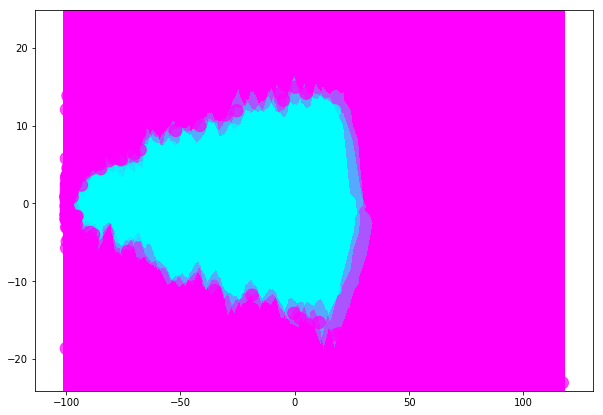

In [14]:
def get_grid(data, border=1., step=.05):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step),
                      np.arange(y_min, y_max, step))
X = np.vstack((a,d))
X = X[:, :2]
y = np.hstack((np.zeros(500),np.ones(500)))
clf = KNN(n_neighbors=3)
clf.fit(X, y)
print(clf)
xx, yy = get_grid(X)
X_in=np.hstack((np.reshape(xx,(xx.size,1)), np.reshape(yy,(yy.size,1))))
predicted = clf.predict_proba(X_in)[:, 1].reshape(xx.shape)
pl.figure(figsize=(10, 7))
pl.pcolormesh(xx, yy, predicted, cmap='cool')
pl.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap='cool', alpha=0.7)

## Task 2. SVM with non linear kernel.

In [4]:
clf = svm.SVC(probability=True)
clf.fit(X,y)
print(clf)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


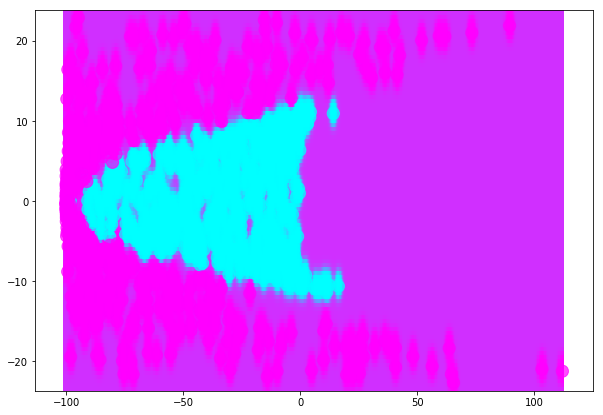

In [5]:
xx, yy = get_grid(X,step=0.5)
X_in=np.hstack((np.reshape(xx,(xx.size,1)), np.reshape(yy,(yy.size,1))))
predicted = clf.predict_proba(X_in)[:, 1].reshape(xx.shape)
pl.figure(figsize=(10, 7))
pl.pcolormesh(xx, yy, predicted, cmap='cool')
pl.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap='cool', alpha=0.7)

# Task 2. Naive bayes.

GaussianNB(priors=None)


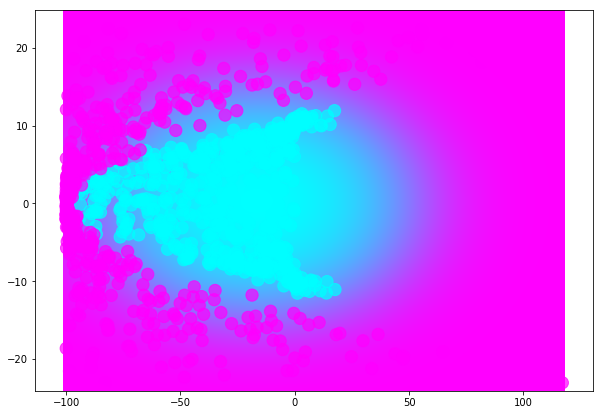

In [15]:
clf = GaussianNB()
clf.fit(X,y)
print(clf)
xx, yy = get_grid(X)
X_in=np.hstack((np.reshape(xx,(xx.size,1)), np.reshape(yy,(yy.size,1))))
predicted = clf.predict_proba(X_in)[:, 1].reshape(xx.shape)
pl.figure(figsize=(10, 7))
pl.pcolormesh(xx, yy, predicted, cmap='cool')
pl.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap='cool', alpha=0.7)

# Task 1. Non linear surfice boarder. Bias error 20%.

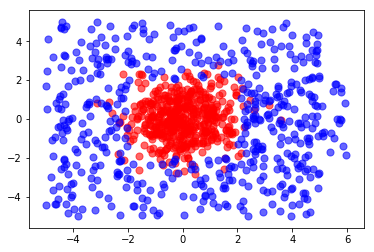

In [16]:
#Task one. Non liniar surface boarder. Bias error 20%.
an = 500;
bn = 500;

a = np.random.normal(loc=0, scale=1, size=(an,4))
b = np.random.uniform(low=-5, high=5, size=(bn,4))

for i in range(0, bn):
    if (b[i][0] < 2) and (b[i][1] < 2) and (b[i][0] > -2) and (b[i][1] > -2):
        b[i][0] += 2
        b[i][0] += 2
        
pl.scatter(a[:,0], a[:,1], c='red',  s=50, alpha=0.6)
pl.scatter(b[:,0], b[:,1], c='blue', s=50, alpha=0.6)

pl.show()

# Task 2. K nearest neighbours.

In [17]:
X = np.vstack((a,b))
X = X[:, :2]
y = np.hstack((np.zeros(500),np.ones(500)))
clf = KNN(n_neighbors=5)
clf.fit(X, y)
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


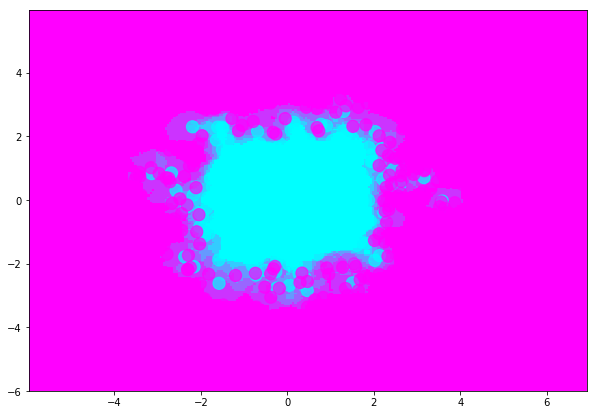

In [18]:
def get_grid(data, border=1., step=.05):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step),
                      np.arange(y_min, y_max, step))
xx, yy = get_grid(X)
X_in=np.hstack((np.reshape(xx,(xx.size,1)), np.reshape(yy,(yy.size,1))))
predicted = clf.predict_proba(X_in)[:, 1].reshape(xx.shape)
pl.figure(figsize=(10, 7))
pl.pcolormesh(xx, yy, predicted, cmap='cool')
pl.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap='cool', alpha=0.7)

# Task 2. Naive bayes.

GaussianNB(priors=None)


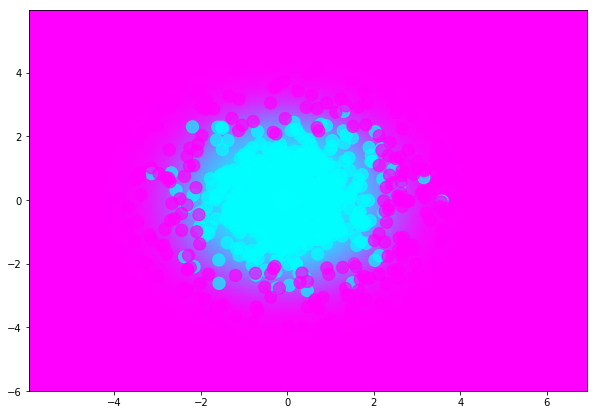

In [19]:
clf = GaussianNB()
clf.fit(X,y)
print(clf)
xx, yy = get_grid(X)
X_in=np.hstack((np.reshape(xx,(xx.size,1)), np.reshape(yy,(yy.size,1))))
predicted = clf.predict_proba(X_in)[:, 1].reshape(xx.shape)
pl.figure(figsize=(10, 7))
pl.pcolormesh(xx, yy, predicted, cmap='cool')
pl.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap='cool', alpha=0.7)

# Task 2. SVM with non linear kernel.

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


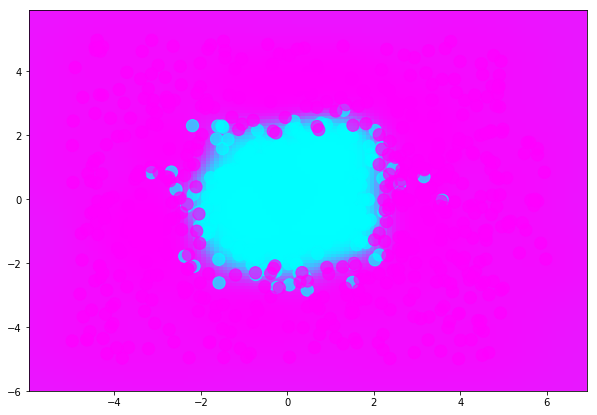

In [21]:
clf = svm.SVC(probability=True)
clf.fit(X,y)
print(clf)
xx, yy = get_grid(X,step=0.1)
X_in=np.hstack((np.reshape(xx,(xx.size,1)), np.reshape(yy,(yy.size,1))))
predicted = clf.predict_proba(X_in)[:, 1].reshape(xx.shape)
pl.figure(figsize=(10, 7))
pl.pcolormesh(xx, yy, predicted, cmap='cool')
pl.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap='cool', alpha=0.7)